In [50]:
from google.colab import files
uploaded = files.upload()

Saving Costomer+OrderForm.csv to Costomer+OrderForm.csv


**REQUIRED** **LIBRYERS**

In [72]:
import pandas as pd 
import seaborn as sns
from sklearn import preprocessing 
import numpy as np
import scipy.stats as stats

Data Preprocessing 

In [73]:
import pandas as pd

In [74]:
Customer_data = pd.read_csv("Costomer+OrderForm.csv")

In [75]:
Customer_data

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [76]:
Customer_data.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [77]:
Customer_data.dtypes

Phillippines    object
Indonesia       object
Malta           object
India           object
dtype: object

In [78]:
Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [79]:
Customer_data.columns

Index(['Phillippines', 'Indonesia', 'Malta', 'India'], dtype='object')

In [80]:
list(Customer_data)

['Phillippines', 'Indonesia', 'Malta', 'India']

In [82]:
Customer_data.isnull().sum()     # finding missing values

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [83]:
Customer_data.shape

(300, 4)

In [88]:
Customer_data.value_counts()

Phillippines  Indonesia   Malta       India     
Error Free    Error Free  Error Free  Error Free    206
Defective     Error Free  Error Free  Error Free     21
Error Free    Defective   Error Free  Error Free     20
              Error Free  Defective   Error Free     18
                          Error Free  Defective      16
              Defective   Defective   Error Free      9
Defective     Error Free  Defective   Error Free      4
              Defective   Error Free  Error Free      2
              Error Free  Error Free  Defective       2
Error Free    Defective   Error Free  Defective       2
dtype: int64

In [89]:
Customer_data.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [90]:
Customer_data.describe().T

,count,unique,top,freq
Phillippines,300,2,Error Free,271
Indonesia,300,2,Error Free,267
Malta,300,2,Error Free,269
India,300,2,Error Free,280


# Test of hypothesis


In [91]:
'''
#Test of Hypothesis
Ho: c1 = c2 = c3 = c4 ---> All 4 call centers defective % are varying by 5% from center
H1: c1 != c2 != c3 != c4 ---> Any one of the 4 call centers defective % are NOT varying by 5% from center
'''

'\n#Test of Hypothesis\nHo: c1 = c2 = c3 = c4 ---> All 4 call centers defective % are varying by 5% from center\nH1: c1 != c2 != c3 != c4 ---> Any one of the 4 call centers defective % are NOT varying by 5% from center\n'

#Converting categorical data to numerical by label encoding


In [92]:
from sklearn import preprocessing 
lable_encoder = preprocessing.LabelEncoder()
Customer_data["Phillippines"]=lable_encoder.fit_transform(Customer_data["Phillippines"])
Customer_data["Indonesia"]=lable_encoder.fit_transform(Customer_data["Indonesia"])
Customer_data["Malta"]=lable_encoder.fit_transform(Customer_data["Malta"])
Customer_data["India"]=lable_encoder.fit_transform(Customer_data["India"])

In [93]:
Customer_data

,Phillippines,Indonesia,Malta,India
0,1,1,0,1
1,1,1,1,0
2,1,0,0,1
3,1,1,1,1
4,1,1,0,1
...,...,...,...,...
295,1,1,1,1
296,1,1,1,1
297,1,1,0,1
298,1,1,1,1


# <<<<< EXPLORATION DATA ANALYSIS <<<<<


# Scatter plot between the variables along with histograms


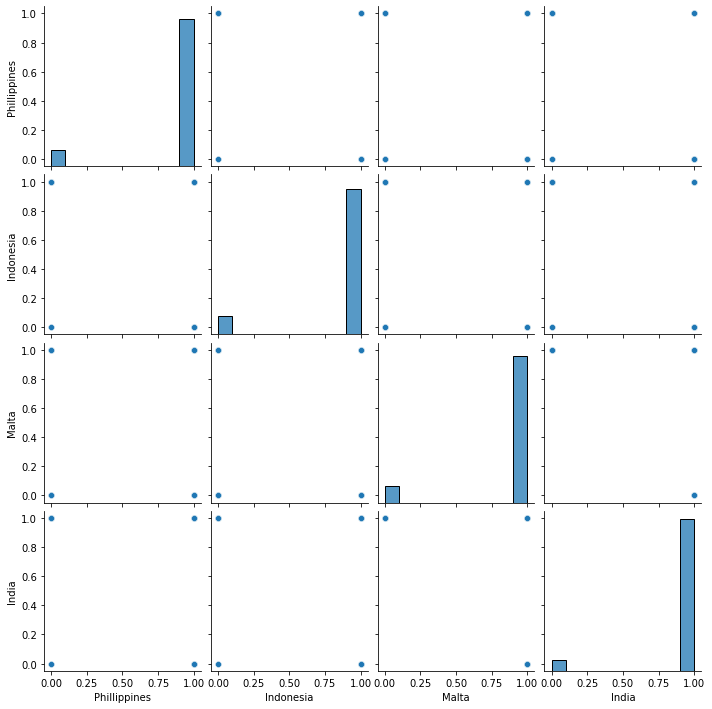

In [94]:
import seaborn as sns
sns.pairplot(Customer_data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d533dccd0>,
      dtype=object)

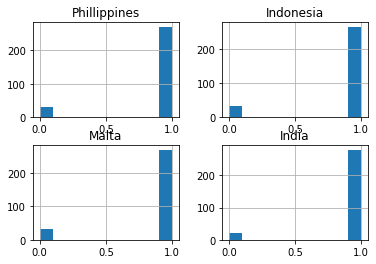

In [95]:
Customer_data.hist()

In [96]:
Customer_data.value_counts()

Phillippines  Indonesia  Malta  India
1             1          1      1        206
0             1          1      1         21
1             0          1      1         20
              1          0      1         18
                         1      0         16
              0          0      1          9
0             1          0      1          4
              0          1      1          2
              1          1      0          2
1             0          1      0          2
dtype: int64

In [97]:
Customer_data.describe()

,Phillippines,Indonesia,Malta,India
count,300.000000,300.000000,300.000000,300.000000
mean,0.903333,0.890000,0.896667,0.933333
std,0.295997,0.313413,0.304902,0.249861
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [98]:
Customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Phillippines,300.0,0.903333,0.295997,0.0,1.0,1.0,1.0,1.0
Indonesia,300.0,0.890000,0.313413,0.0,1.0,1.0,1.0,1.0
Malta,300.0,0.896667,0.304902,0.0,1.0,1.0,1.0,1.0
India,300.0,0.933333,0.249861,0.0,1.0,1.0,1.0,1.0


In [101]:
C1=Customer_data['Phillippines']
C2=Customer_data['Indonesia']
C3=Customer_data['Malta']
C4=Customer_data['India']

In [102]:
import scipy.stats as stats
z,p=stats.f_oneway(C1,C2,C3,C4)
print(z,p)

1.286168556089167 0.2776780955705948


In [103]:
alpha=0.05

In [104]:
if p < alpha:
    print("Ho is rejected and H1 is accepted")
else:
    print("H1 is rejected and H0 is accepted")

H1 is rejected and H0 is accepted


In [105]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> RESULTS <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# Inference: According to the test of hypothesis we are getting that H0 is accapting and H1 is rejecting 
# Ho: C1 = C2 = C3 = C4 ---> All 4 call centers defective % are varying by 5% from center
# H1: C1 != C2 != C3 != C4 ---> Any one of the 4 call centers defective % are NOT varying by 5% from center

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


# RESULT : So,All the 4 Call centers defective % are varying by 5% level of significance from its center.
